# RESTAURANTS

We are given a dataset of a Restaurant. the information about its independent and dependent variables are given below. Our task is to viusalize and analyze the key drivers of profit for this firm.

|  Variables       | Description                                                          |        
|------------------|---------                                                             |
| People           | Each day how many people had meals there.                            |
| Price of beef    | the price for the beef in the kitchen, Kr/Kg                         |
| Price of Potato  | the price for the potatoes in the kitchen, Kr/Kg.                    |
| Sunshine_index   |  the weather condition. If sunshine_index is high, the possibility of people of going to beaches increases.                                                               |
| Sample           | the cost for the sample free food each day, Kr                       |
| 	Marketing      | the fee for the food ordering platform each day, Kr.                 |
|Profit | Each day the profit, thousand Kr, i.e., KKr.                                    |

Let's import the packages we are going to need for this task.

In [2]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics

## Data Inputting and cleaning

Let's Load the DataFrame to see what we are going to be working with.

In [3]:
Res_df = pd.read_csv('restaurantprofit4.csv')
Res_df_1 = Res_df[['profit','people','price_of_beef', 'price_of_potato','sample',\
                   'sunshine_index', 'marketing']]
Res_df_1.head()

,profit,people,price_of_beef,price_of_potato,sample,sunshine_index,marketing
0,13.9,78,50,7.8,169,10,222
1,8.5,73,48,8.0,167,13,224
2,14.3,70,47,8.1,167,15,247
3,9.7,67,45,8.3,165,18,263
4,14.6,68,45,8.4,120,19,653


## Data Assessment

Let's make a histogram of our dependent variable __profit__ to see

Text(0, 0.5, 'Frequency')

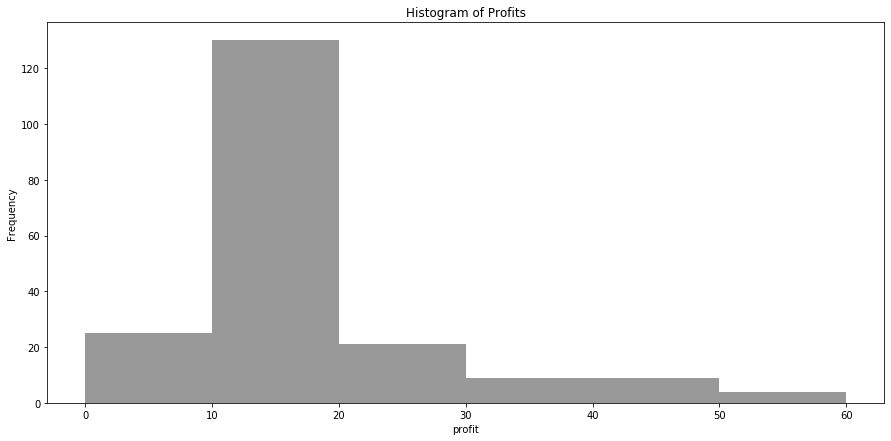

In [4]:
plt.figure(figsize=(15, 7))
sns.set_color_codes()
sns.distplot(Res_df_1['profit'],kde=False, color="black", bins= [0,10,20,30,40,50,60])
plt.title('Histogram of Profits')
plt.ylabel('Frequency')

We can see __profits__ atleast is skewed to the right. This might be the case for other columns too, Let's have a look at a summary of our data.

In [5]:
Res_df_1.describe()

,profit,people,price_of_beef,price_of_potato,sample,sunshine_index,marketing
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,17.515152,69.207071,43.601010,8.911111,46.479798,25.898990,356.353535
std,9.809292,12.044020,5.235315,0.874499,24.380801,4.989318,49.677909
min,7.000000,52.000000,35.000000,7.100000,4.000000,10.000000,222.000000
25%,11.525000,61.000000,40.000000,8.300000,34.250000,23.000000,345.000000
50%,14.500000,65.000000,42.000000,8.900000,48.000000,26.000000,352.000000
75%,18.600000,75.000000,47.000000,9.400000,53.750000,30.000000,358.750000
max,58.800000,100.000000,56.000000,11.900000,169.000000,35.000000,654.000000


Let's standardize the data and see their quintiles.

In [21]:
X = np.asarray(Res_df_1[['people','price_of_beef', 'price_of_potato','sample',\
                         'sunshine_index', 'marketing']])
X = preprocessing.StandardScaler().fit(X).transform(X)
Res_norm_df = pd.DataFrame(X)

#Standardizing Dependent variables.
Y = np.asarray(Res_df_1[['profit']])
Y = preprocessing.StandardScaler().fit(Y).transform(Y)
Res_norm_df_Y = pd.DataFrame(Y)
print("Independent variables",Res_norm_df)
print("Dependent Variable",Res_norm_df_Y)

Independent variables             0         1         2         3         4         5
0    0.731917  1.225372 -1.273789  5.038012 -3.194683 -2.711348
1    0.315720  0.842383 -1.044507  4.955773 -2.591874 -2.670987
2    0.066003  0.650888 -0.929866  4.955773 -2.190002 -2.206831
3   -0.183715  0.267899 -0.700584  4.873533 -1.587193 -1.883939
4   -0.100476  0.267899 -0.585943  3.023140 -1.386257  5.986533
..        ...       ...       ...       ...       ...       ...
193 -0.683150 -1.072563  1.133672 -1.623403  0.020297 -1.419783
194 -0.599911 -1.072563  1.362954 -1.664523  0.020297 -1.419783
195 -0.683150 -1.072563  1.248313 -1.705643  0.221233 -1.379422
196 -0.932868 -1.455553  1.821518 -1.746763 -0.180640 -1.419783
197 -0.849629 -1.264058  1.248313 -1.746763 -0.180640 -1.500506

[198 rows x 6 columns]
Dependent Variable             0
0   -0.369478
1   -0.921372
2   -0.328597
3   -0.798729
4   -0.297936
..        ...
193 -0.757848
194  0.315279
195 -0.451240
196 -0.400139
197 -0.001549

In [7]:
#Creating a DataFrame with 50th, 70th and 90th Percentiles.
p1=  [np.percentile(Y, 50)]
p2 = [np.percentile(Y, 70)]
p3 = [np.percentile(Y, 90)]
for item in Res_norm_df:
    q1 = np.percentile(Res_norm_df[item], 50)
    p1.append(q1)
    q2 = np.percentile(Res_norm_df[item], 70)
    p2.append(q2)
    q3 = np.percentile(Res_norm_df[item], 90)
    p3.append(q3)
quint_dic = {"Names":["profit","people", "price_of_beef", "price_of_potato","sample",\
                      "sunshine_index", "marketing"], "50th Percentile":p1,"70th Percentile":p2\
            , "90th Percentile":p3}
quint_df = pd.DataFrame(quint_dic)
quint_df

,Names,50th Percentile,70th Percentile,90th Percentile
0,profit,-0.308156,0.016848,1.467102
1,people,-0.350193,0.307397,1.730787
2,price_of_beef,-0.306585,0.267899,1.665810
3,price_of_potato,-0.012738,0.445826,1.133672
4,sample,0.062510,0.226990,0.321566
5,sunshine_index,0.020297,0.623105,1.225914
6,marketing,-0.087857,0.033227,0.533708


## Standardized Linear Regression

Our dependent variable will be __profit__ and Independent variables are rest of them. Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [8]:
#msk = np.random.rand(len(Res_df_1)) < 0.6
msk = np.random.rand(len(Res_df_1)) < 0.8
train_x = Res_norm_df[msk]
test_x= Res_norm_df[~msk]
train_y = Res_norm_df_Y[msk]
test_y = Res_norm_df_Y[~msk]

Let's now create linear regression models for every variable.

In [9]:
#Linear Regression with Independent Variable: people.
regr_people = linear_model.LinearRegression()
train_people = np.asanyarray(train_x[[0]])
train_profit = np.asanyarray(train_y)
regr_people.fit (train_people, train_profit)

#Linear Regression with Independent Variable: price_of_beef.
regr_price_of_beef = linear_model.LinearRegression()
train_price_of_beef = np.asanyarray(train_x[[1]])
regr_price_of_beef.fit (train_price_of_beef, train_profit)

#Linear Regression with Independent Variable: price_of_potato.
regr_price_of_potato = linear_model.LinearRegression()
train_price_of_potato = np.asanyarray(train_x[[2]])
regr_price_of_potato.fit (train_price_of_potato, train_profit)

#Linear Regression with Independent Variable: sample.
regr_sample = linear_model.LinearRegression()
train_sample = np.asanyarray(train_x[[3]])
regr_sample.fit (train_sample, train_profit)

#Linear Regression with Independent Variable: sunshine_index.
regr_sunshine_index = linear_model.LinearRegression()
train_sunshine_index = np.asanyarray(train_x[[4]])
regr_sunshine_index.fit (train_sunshine_index, train_profit)

#Linear Regression with Independent Variable: marketing.
regr_marketing = linear_model.LinearRegression()
train_marketing = np.asanyarray(train_x[[5]])
regr_marketing.fit (train_marketing, train_profit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have a Linear model with every Independent variable, let's make regression plots of Dependent variable with independent ones.

Text(0.5, 0.98, 'Linear Regression plot of Profit with all other variables with 95% Confidence Interval')

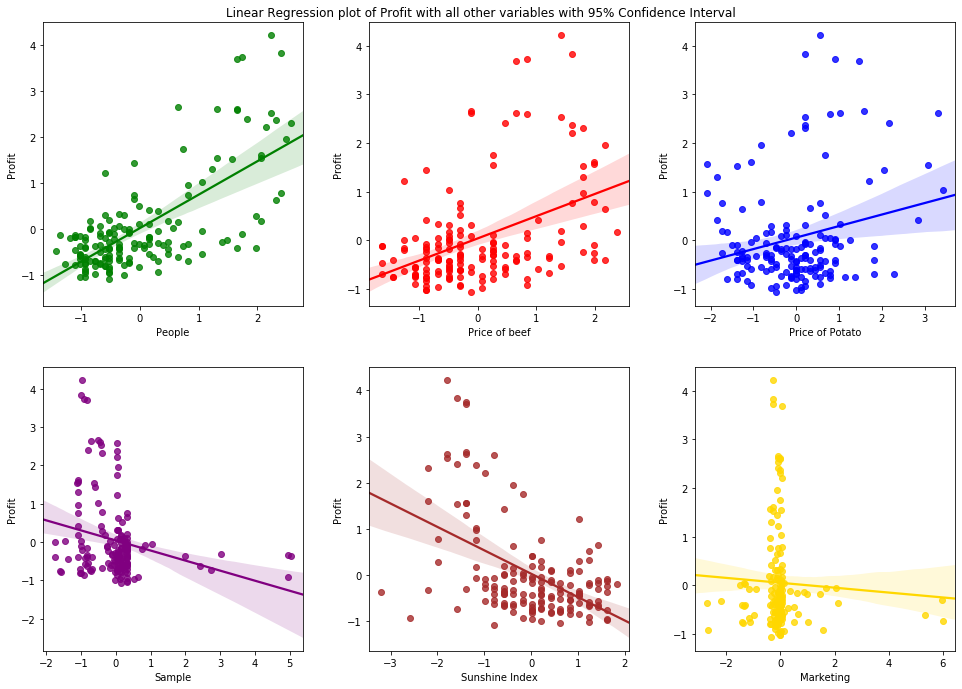

In [10]:
f, axes = plt.subplots(2,3,figsize=(14,10))
sns.regplot(x=train_x[0],y=train_y[0],color='green',ax=axes[0,0])
axes[0,0].set(xlabel="People",ylabel="Profit")
sns.regplot(x=train_x[1],y=train_y[0],color='red',ax=axes[0,1])
axes[0,1].set(xlabel="Price of beef",ylabel="Profit")
sns.regplot(x=train_x[2],y=train_y[0],color='blue',ax=axes[0,2])
axes[0,2].set(xlabel="Price of Potato",ylabel="Profit")
sns.regplot(x=train_x[3],y=train_y[0],color='purple',ax=axes[1,0])
axes[1,0].set(xlabel="Sample",ylabel="Profit")
sns.regplot(x=train_x[4],y=train_y[0],color='brown',ax=axes[1,1])
axes[1,1].set(xlabel="Sunshine Index",ylabel="Profit")
sns.regplot(x=train_x[5],y=train_y[0],color='gold',ax=axes[1,2])
axes[1,2].set(xlabel="Marketing",ylabel="Profit")
f. tight_layout(pad=3.0)
f.suptitle('Linear Regression plot of Profit with all other variables with 95% Confidence Interval')

We will now test the accuracy of our model. This is done by making a prediction about dependent variables with our test data and compare it with actual values.

In [11]:
# Each independent variable trying to capture profit.
Yhat_people = regr_people.predict(test_x[[0]])
Yhat_price_of_beef = regr_people.predict(test_x[[1]])
Yhat_price_of_potato = regr_people.predict(test_x[[2]])
Yhat_sample = regr_people.predict(test_x[[3]])
Yhat_sunshine_index = regr_people.predict(test_x[[4]])
Yhat_marketing = regr_people.predict(test_x[[5]])

#Independent variable evaluation: People.
print('People:Mean Absolute Error', metrics.mean_absolute_error(test_y, Yhat_people))  
print('People:Mean Squared Error', metrics.mean_squared_error(test_y, Yhat_people))  
print('People:Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y, Yhat_people)))

#Independent variable evaluation: Price of beef.
print('Price of beef:Mean Absolute Error', metrics.mean_absolute_error(test_y, Yhat_price_of_beef))  
print('Price of beef:Mean Squared Error', metrics.mean_squared_error(test_y, Yhat_price_of_beef))  
print('Price of beef:Root Mean Squared Error', np.sqrt(metrics.mean_squared_error\
                                                       (test_y,Yhat_price_of_beef)))
#Independent variable evaluation: Price of Potato.
print('Price of potato:Mean Absolute Error', metrics.mean_absolute_error(test_y, Yhat_price_of_potato))  
print('Price of potato:Mean Squared Error', metrics.mean_squared_error(test_y, Yhat_price_of_potato))  
print('Price of potato:Root Mean Squared Error', np.sqrt(metrics.mean_squared_error\
                                                         (test_y, Yhat_price_of_potato)))

#Independent variable evaluation: Sample.
print('Sample:Mean Absolute Error', metrics.mean_absolute_error(test_y, Yhat_sample))  
print('Sample:Mean Squared Error', metrics.mean_squared_error(test_y, Yhat_sample))  
print('Sample:Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y, Yhat_sample)))

#Independent variable evaluation: Sunshine Index.
print('Sunshine Index:Mean Absolute Error', metrics.mean_absolute_error(test_y, Yhat_sunshine_index))  
print('Sunshine Index:Mean Squared Error', metrics.mean_squared_error(test_y, Yhat_sunshine_index))  
print('Sunshine Index:Root Mean Squared Error', np.sqrt(metrics.mean_squared_error\
                                                        (test_y, Yhat_sunshine_index)))

#Independent variable evaluation: Marketing.
print('Marketing:Mean Absolute Error', metrics.mean_absolute_error(test_y, Yhat_marketing))  
print('Marketing:Mean Squared Error', metrics.mean_squared_error(test_y, Yhat_marketing))  
print('Marketing:Root Mean Squared Error', np.sqrt(metrics.mean_squared_error\
                                                   (test_y, Yhat_marketing)))

People:Mean Absolute Error 0.47820882163928086
People:Mean Squared Error 0.38825999139293565
People:Root Mean Squared Error 0.6231051206601785
Price of beef:Mean Absolute Error 0.5571269505225812
Price of beef:Mean Squared Error 0.5321807661903998
Price of beef:Root Mean Squared Error 0.729507207771383
Price of potato:Mean Absolute Error 0.7450038871649031
Price of potato:Mean Squared Error 0.997841009887168
Price of potato:Root Mean Squared Error 0.9989199216589726
Sample:Mean Absolute Error 0.8227546926491055
Sample:Mean Squared Error 1.396457611493001
Sample:Root Mean Squared Error 1.1817180761471837
Sunshine Index:Mean Absolute Error 0.8347793565892939
Sunshine Index:Mean Squared Error 1.1818606948722383
Sunshine Index:Root Mean Squared Error 1.0871341659943534
Marketing:Mean Absolute Error 0.7398021715241652
Marketing:Mean Squared Error 1.0066040995402865
Marketing:Root Mean Squared Error 1.0032966159318422


As we can see, All of 6 __Root Mean Squared Errors__ are very high. Clearly none of independent variables predict profit quite right individually. 

## Multiple Linear Regression

Let's use all independent variables together to capture Profit.

In [12]:
regr_multi = linear_model.LinearRegression()
regr_multi.fit (train_x, train_y)
# The coefficients
print ('Coefficients:', regr_multi.coef_)

Coefficients: [[ 1.67239594 -1.24631249 -0.20575029 -0.16784489 -0.12300891  0.04456649]]


Let's predict variable profit using this model.

In [13]:
Yhat_multi=regr_multi.predict(test_x)
Yhat_multi[0:5]

array([[-1.18049058],
       [-0.3737166 ],
       [-0.39144007],
       [-0.27111025],
       [-0.41953821]])

Let's evaluate this model and see if it performs any better than previous ones. 

In [14]:
print('Mean Absolute Error', metrics.mean_absolute_error(test_y, Yhat_multi))  
print('Mean Squared Error', metrics.mean_squared_error(test_y, Yhat_multi))  
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y, Yhat_multi)))

Mean Absolute Error 0.4361373867617949
Mean Squared Error 0.3216443826122759
Root Mean Squared Error 0.5671370051515559


A much lower __Root Mean Squared Error__! Multiple linear model proves to be more succesfull in predicting profit. 
I tried changing training set from consisting 80% of data to 60% to see how it affects my prediction.
This is the output i got:

|  Method       | Score                                                         |        
|------------------|---------                                                             |
| Mean Absolute Error           | 0.5059939882586635                           |
| Mean Squared Error    | 0.42372684457000237                         |
| Root Mean Squared Error  | 0.6509430424929683                    |


As it can be seen, __Root Mean Squared Error__ has decreased. This isn't neccessarily a good thing as a high training accuracy could indicate over-fitting.

__What is correlation between people and profit? What does it look like?__

In [15]:
# Calculating correlation matrix.
np.corrcoef(Res_df_1['people'], Res_df_1['profit'])

array([[1.        , 0.68148666],
       [0.68148666, 1.        ]])

Main diagonals are of value 1 as expected. Off diagonal values show correlatipn which takes a value of __0.68148666__.

Let's now make a scatter plot between our variables to visualize this correlation.

Text(0.5, 1.0, 'Relationship between Profit and People')

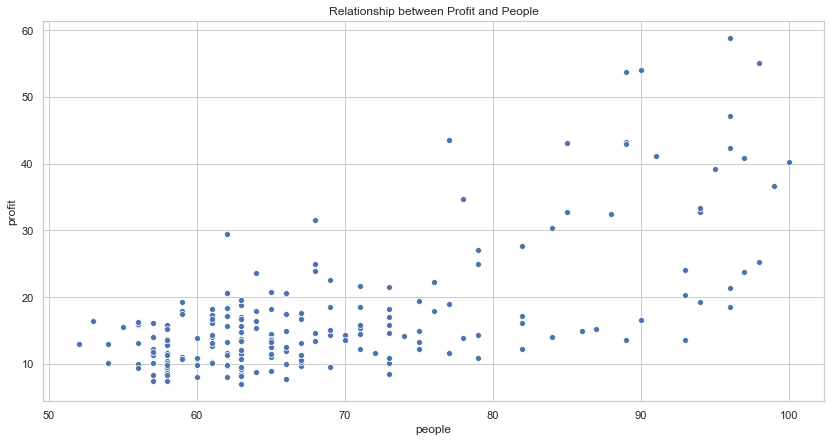

In [327]:
plt.figure(figsize=(14, 7))
ax = sns.scatterplot(x="people", y="profit", data=Res_df_1)
plt.title('Relationship between Profit and People')